In [30]:
# Import Libraries
print("""
📌 Step 1: Importing Libraries

This step brings in all necessary tools:
- pandas and numpy: for data handling and numerical calculations
- seaborn and matplotlib: for creating data visualizations
- sklearn modules: for machine learning preprocessing, training, and evaluation
- warnings: suppresses non-critical output to keep the notebook clean
""")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


📌 Step 1: Importing Libraries

This step brings in all necessary tools:
- pandas and numpy: for data handling and numerical calculations
- seaborn and matplotlib: for creating data visualizations
- sklearn modules: for machine learning preprocessing, training, and evaluation
- warnings: suppresses non-critical output to keep the notebook clean



In [31]:
# Load the Dataset
print("""
Load the Dataset

I loaded the dataset using pandas’ read_csv function. This reads the CSV file and stores it in a DataFrame.

`df = pd.read_csv(...)`: loads the CSV file.
`df.head()`: displays the first 5 rows to help understand what kind of data we’re dealing with — column names, value types, and format.

This preview helps detect things like typos, missing values, or incorrect data types early.
""")
df = pd.read_csv("laptop_prices.csv")
df.head()


Load the Dataset

I loaded the dataset using pandas’ read_csv function. This reads the CSV file and stores it in a DataFrame.

`df = pd.read_csv(...)`: loads the CSV file.
`df.head()`: displays the first 5 rows to help understand what kind of data we’re dealing with — column names, value types, and format.

This preview helps detect things like typos, missing values, or incorrect data types early.



,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [32]:
# Data Overview
print("""
📌 Step 3: Initial Data Overview

This step involves inspecting the data’s size and health:

▶️ `df.shape`: tells how many rows and columns are present — in other words, how many data samples and how many features.
▶️ `df.info()`: provides data types and how many non-null entries exist per column.
▶️ `df.isnull().sum()`: checks for missing values by counting the number of NaNs in each column.

Together, these checks guide how much data cleaning or preparation is needed.
""")
print(df.shape)
print(df.info())
print(df.isnull().sum())


📌 Step 3: Initial Data Overview

This step involves inspecting the data’s size and health:

▶️ `df.shape`: tells how many rows and columns are present — in other words, how many data samples and how many features.
▶️ `df.info()`: provides data types and how many non-null entries exist per column.
▶️ `df.isnull().sum()`: checks for missing values by counting the number of NaNs in each column.

Together, these checks guide how much data cleaning or preparation is needed.

(1275, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object

In [33]:
# Data Cleaning
print("""
To prepare the dataset for modeling, I filled missing values in all numeric columns using the median of each column.

I chose the median because it is a more robust measure than the mean when dealing with skewed data or outliers. This step ensures our data is complete and avoids errors during training caused by null values.
""")
df.fillna(df.median(numeric_only=True), inplace=True)


To prepare the dataset for modeling, I filled missing values in all numeric columns using the median of each column.

I chose the median because it is a more robust measure than the mean when dealing with skewed data or outliers. This step ensures our data is complete and avoids errors during training caused by null values.




📌 Step 5: Univariate Exploratory Data Analysis (EDA)

I used bar and pie charts to analyze individual features:
- Company: Which brands are most common?
- OS: What operating systems are used?
- Touchscreen: How many laptops offer it?
These insights help identify the product spread.



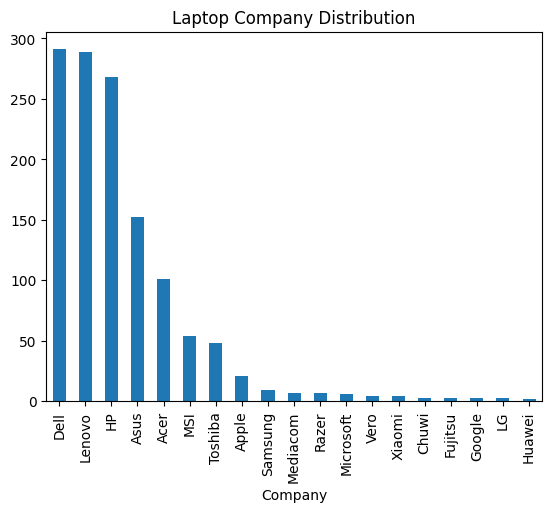

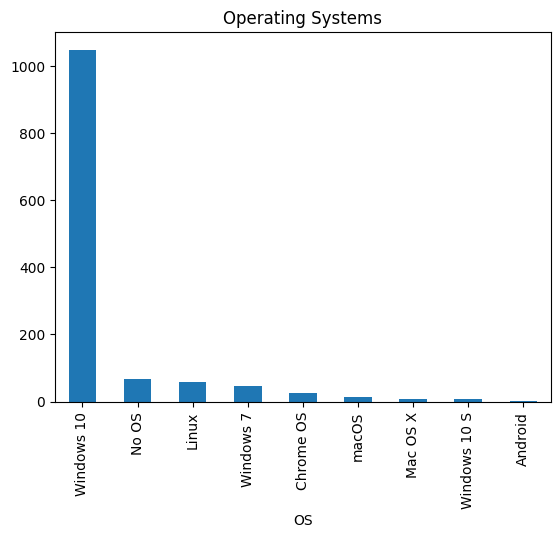

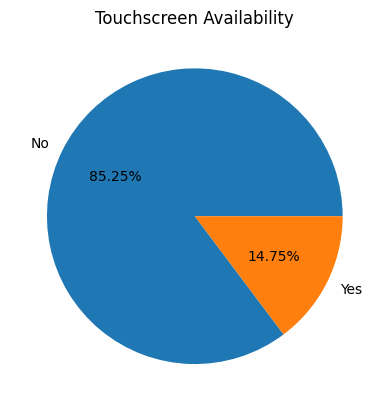

In [34]:
# Univariate EDA
print("""
📌 Step 5: Univariate Exploratory Data Analysis (EDA)

I used bar and pie charts to analyze individual features:
- Company: Which brands are most common?
- OS: What operating systems are used?
- Touchscreen: How many laptops offer it?
These insights help identify the product spread.
""")
df['Company'].value_counts().plot(kind='bar', title='Laptop Company Distribution')
plt.show()
df['OS'].value_counts().plot(kind='bar', title='Operating Systems')
plt.show()
df['Touchscreen'].value_counts().plot(kind='pie', autopct='%.2f%%', title='Touchscreen Availability')
plt.ylabel('')
plt.show()


📌 Step 6: Bivariate Analysis (Feature vs Price)

Boxplots and barplots reveal how features impact price:
- OS vs Price: Is Windows more expensive than others?
- Storage vs Price: Do primary/secondary storage influence cost?
This helps identify pricing trends and potential feature value.



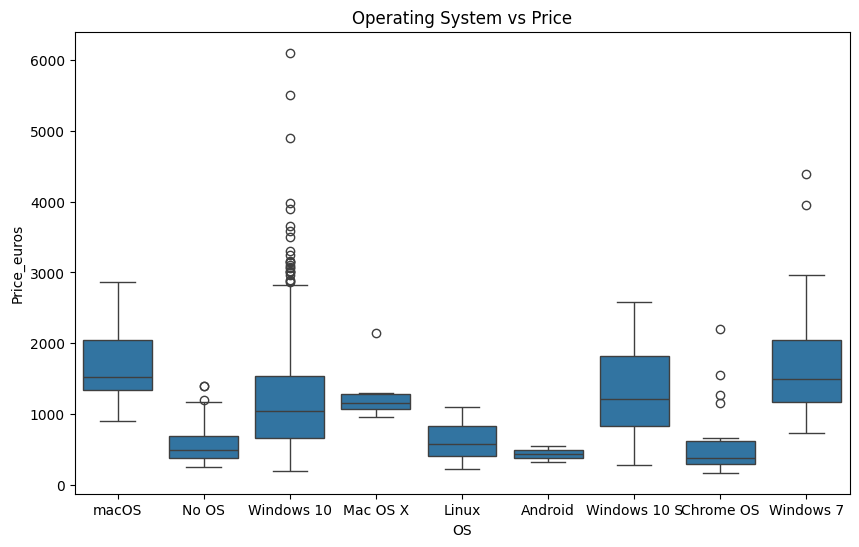

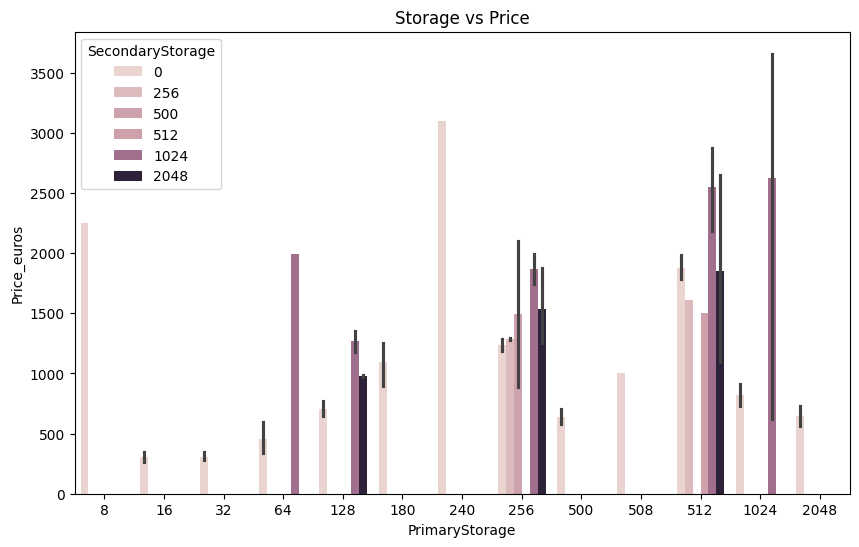

In [35]:
# Bivariate EDA
print("""
📌 Step 6: Bivariate Analysis (Feature vs Price)

Boxplots and barplots reveal how features impact price:
- OS vs Price: Is Windows more expensive than others?
- Storage vs Price: Do primary/secondary storage influence cost?
This helps identify pricing trends and potential feature value.
""")
plt.figure(figsize=(10,6))
sns.boxplot(x='OS', y='Price_euros', data=df)
plt.title('Operating System vs Price')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='PrimaryStorage', y='Price_euros', hue='SecondaryStorage', data=df)
plt.title('Storage vs Price')
plt.show()

In [36]:
# Encode Categorical Columns
print("""
📌 Step 7: Encode Categorical Features

Since ML models don’t understand text, I used Label Encoding to convert strings into numeric codes.
Every object (categorical) column was transformed so it could be used in model training.
""")
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


📌 Step 7: Encode Categorical Features

Since ML models don’t understand text, I used Label Encoding to convert strings into numeric codes.
Every object (categorical) column was transformed so it could be used in model training.



In [37]:
# Feature and Target Selection
print("""
📌 Step 8: Define Features (X) and Target (y)

The 'Price_euros' column is the value we want to predict. All other columns are inputs/features.
This step separates predictors and target.
""")
X = df.drop(columns=['Price_euros'])
y = df['Price_euros']


📌 Step 8: Define Features (X) and Target (y)

The 'Price_euros' column is the value we want to predict. All other columns are inputs/features.
This step separates predictors and target.



In [38]:
# Train/Test Split
print("""
📌 Step 9: Split Data into Training and Testing Sets

I split the data 80/20 using train_test_split. The model will learn patterns from 80% and be evaluated on 20%.
This approach avoids overfitting and reflects real-world performance.
""")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


📌 Step 9: Split Data into Training and Testing Sets

I split the data 80/20 using train_test_split. The model will learn patterns from 80% and be evaluated on 20%.
This approach avoids overfitting and reflects real-world performance.



In [39]:
# Linear Regression
print("""
📌 Step 10: Linear Regression Modeling

I trained a simple Linear Regression model to predict price.
Then I calculated:
- R² Score: How much variance the model explains.
- RMSE: Average prediction error in Euros.
These help evaluate model accuracy.
""")
lr = LinearRegression()

# Train the linear model on the training data
lr.fit(X_train, y_train)  # Fits a straight-line relationship between features and price

# Predict laptop prices on the test set
y_pred_lr = lr.predict(X_test)  # Returns predicted prices based on learned weights
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"Linear Regression R²: {r2_lr:.2f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")


📌 Step 10: Linear Regression Modeling

I trained a simple Linear Regression model to predict price.
Then I calculated:
- R² Score: How much variance the model explains.
- RMSE: Average prediction error in Euros.
These help evaluate model accuracy.

Linear Regression R²: 0.74
Linear Regression RMSE: 358.02


In [40]:
# Random Forest Model
print("""
📌 Step 11: Random Forest Model

I used a Random Forest Regressor — a robust ensemble method.
It typically performs better than linear models, especially with non-linear data.
Again, I evaluated it using R² and RMSE.
""")
rf = RandomForestRegressor()

# Train the Random Forest model
rf.fit(X_train, y_train)  # Builds multiple decision trees on training data and averages them

# Predict on the test set
y_pred_rf = rf.predict(X_test)  # Outputs ensemble-based predictions for each laptop  # Outputs ensemble-based predictions for each laptop
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest R²: {r2_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")


📌 Step 11: Random Forest Model

I used a Random Forest Regressor — a robust ensemble method.
It typically performs better than linear models, especially with non-linear data.
Again, I evaluated it using R² and RMSE.

Random Forest R²: 0.88
Random Forest RMSE: 248.11


In [41]:
# 12. XGBoost Model
print("""
📌 Step 12: XGBoost Regressor

I used the XGBoost Regressor — a high-performance gradient boosting algorithm known for speed and accuracy.
Like Random Forest, XGBoost uses multiple decision trees but focuses more on correcting previous errors.
It generally performs very well on structured/tabular datasets.
""")
xgb = XGBRegressor()

# Train the XGBoost model
xgb.fit(X_train, y_train)  # Learns patterns by optimizing through gradient boosting

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)  # Provides refined predictions by minimizing prediction error

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R²: {r2_xgb:.2f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")


📌 Step 12: XGBoost Regressor

I used the XGBoost Regressor — a high-performance gradient boosting algorithm known for speed and accuracy.
Like Random Forest, XGBoost uses multiple decision trees but focuses more on correcting previous errors.
It generally performs very well on structured/tabular datasets.

XGBoost R²: 0.90
XGBoost RMSE: 224.47



📌 Step 12: Actual vs Predicted Plot

This scatter plot compares actual prices vs predicted prices.
Points near the diagonal line indicate accurate predictions.
It visually validates model effectiveness.



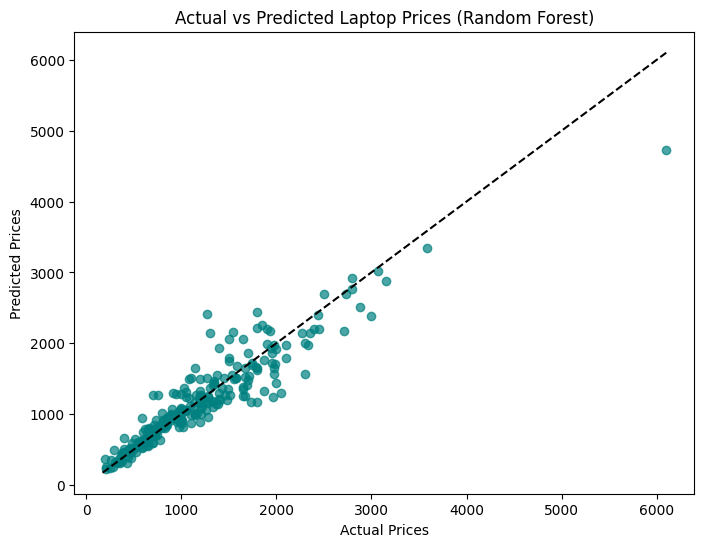

In [42]:
# Actual vs Predicted
print("""
📌 Step 12: Actual vs Predicted Plot

This scatter plot compares actual prices vs predicted prices.
Points near the diagonal line indicate accurate predictions.
It visually validates model effectiveness.
""")
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices (Random Forest)")
plt.show()


📌 Step 13: Residual Plot (Model Errors)

Residuals = Actual - Predicted prices.
A histogram of these residuals shows whether the model's errors are centered around 0 (ideal) or skewed.
This helps detect bias or underfitting/overfitting.



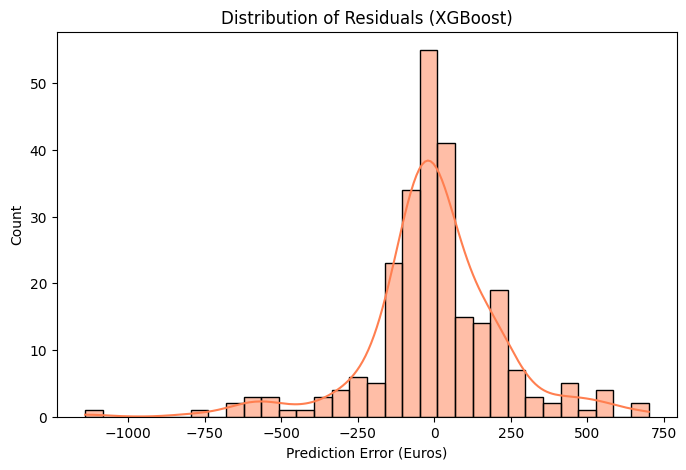

In [43]:
# 14. Residual Plot
print("""
📌 Step 13: Residual Plot (Model Errors)

Residuals = Actual - Predicted prices.
A histogram of these residuals shows whether the model's errors are centered around 0 (ideal) or skewed.
This helps detect bias or underfitting/overfitting.
""")
residuals = y_test - y_pred_xgb
plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True, color='coral')
plt.title("Distribution of Residuals (XGBoost)")
plt.xlabel("Prediction Error (Euros)")
plt.show()


📌 Step 14: Feature Importance from XGBoost

This bar plot shows which features had the most influence in predicting laptop prices.
Understanding this can guide product pricing and business strategy.



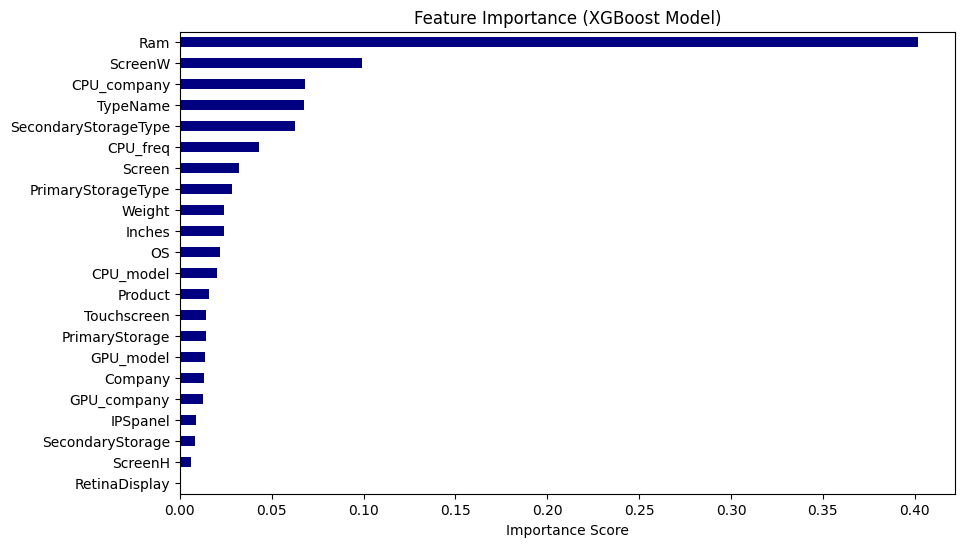

In [44]:
# 15. Feature Importance
print("""
📌 Step 14: Feature Importance from XGBoost

This bar plot shows which features had the most influence in predicting laptop prices.
Understanding this can guide product pricing and business strategy.
""")
importances = xgb.feature_importances_
features = X.columns
importance_df = pd.Series(importances, index=features).sort_values(ascending=True)
plt.figure(figsize=(10,6))
importance_df.plot(kind='barh', color='navy')
plt.title("Feature Importance (XGBoost Model)")
plt.xlabel("Importance Score")
plt.show()

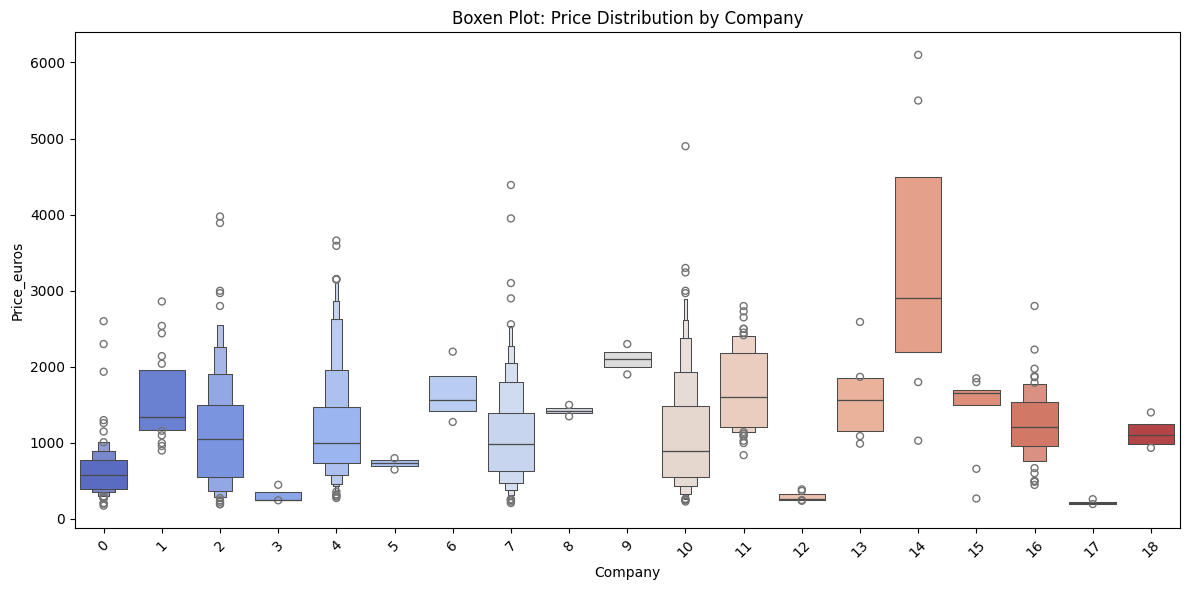

In [45]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x='Company', y='Price_euros', palette='coolwarm')
plt.title("Boxen Plot: Price Distribution by Company")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

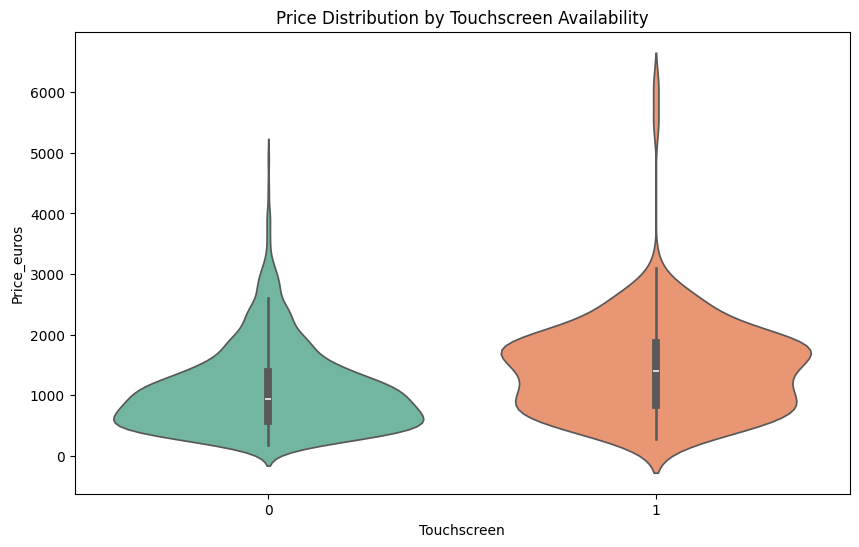

In [46]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Touchscreen', y='Price_euros', data=df, palette='Set2')
plt.title("Price Distribution by Touchscreen Availability")
plt.show()

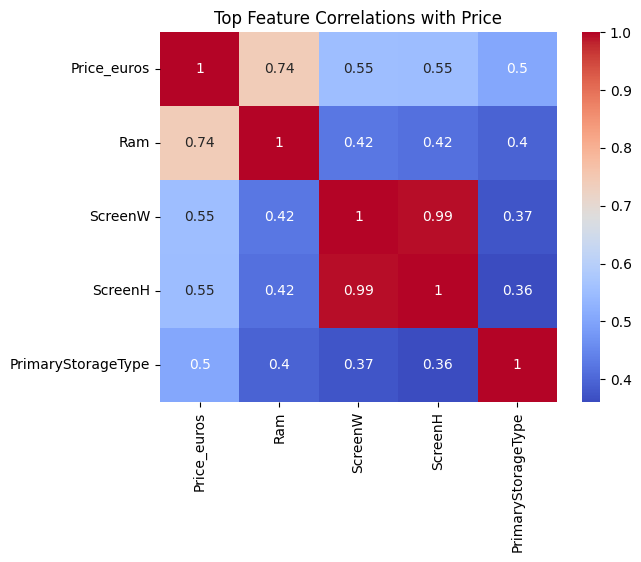

In [47]:
top_corr = df.corr().abs().nlargest(5, 'Price_euros')['Price_euros'].index
sns.heatmap(df[top_corr].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with Price")
plt.show()


📌 Step 16: Partial Dependence Plot for RAM

This plot shows how laptop price prediction changes as RAM size increases, holding all other features constant.

This helps explain non-linear relationships (e.g., RAM increase has diminishing return on price).



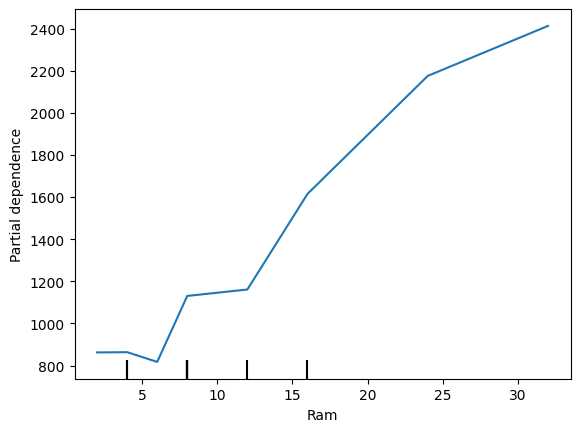

In [48]:
print("""
📌 Step 16: Partial Dependence Plot for RAM

This plot shows how laptop price prediction changes as RAM size increases, holding all other features constant.

This helps explain non-linear relationships (e.g., RAM increase has diminishing return on price).
""")

from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(xgb, X_test, ['Ram'], kind='average')
plt.show()


📌 New Visual: Predicted vs Actual Line Plot (Sorted)

This line plot shows how close the model’s predicted prices are to the actual prices, across sorted test data points.

It’s a great way to show prediction consistency.



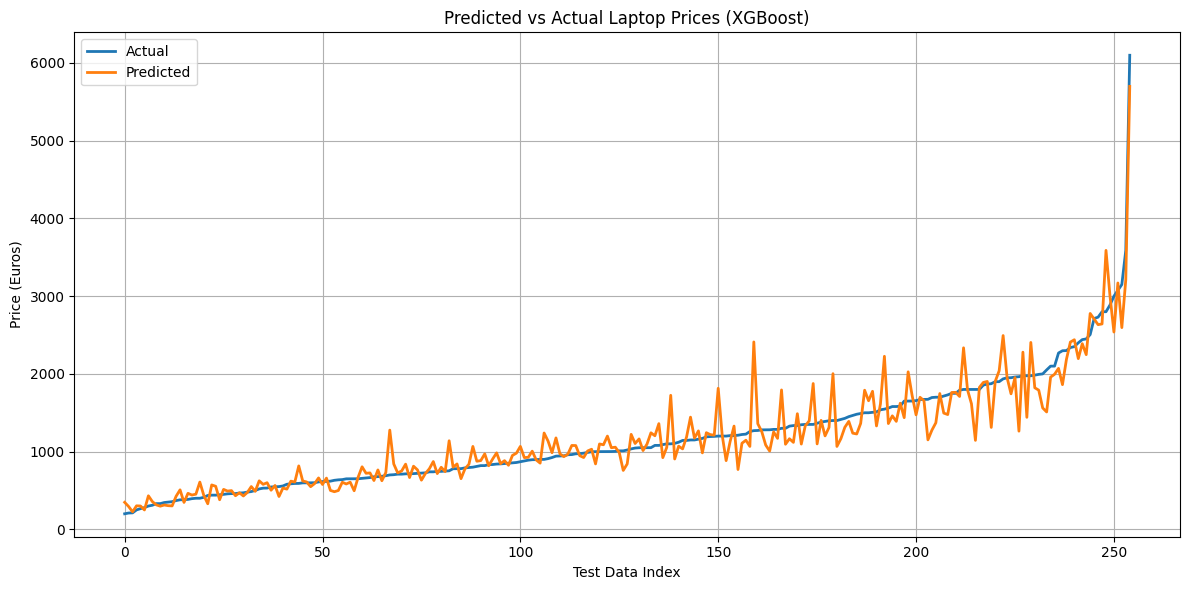

In [49]:
print("""
📌 New Visual: Predicted vs Actual Line Plot (Sorted)

This line plot shows how close the model’s predicted prices are to the actual prices, across sorted test data points.

It’s a great way to show prediction consistency.
""")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgb})
comparison = comparison.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(12,6))
plt.plot(comparison['Actual'], label='Actual', linewidth=2)
plt.plot(comparison['Predicted'], label='Predicted', linewidth=2)
plt.title("Predicted vs Actual Laptop Prices (XGBoost)")
plt.xlabel("Test Data Index")
plt.ylabel("Price (Euros)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📌 New Visual: Correlation Heatmap

This heatmap shows correlations between all numeric features and laptop price.

Strong positive or negative correlations help justify why certain features are powerful predictors.



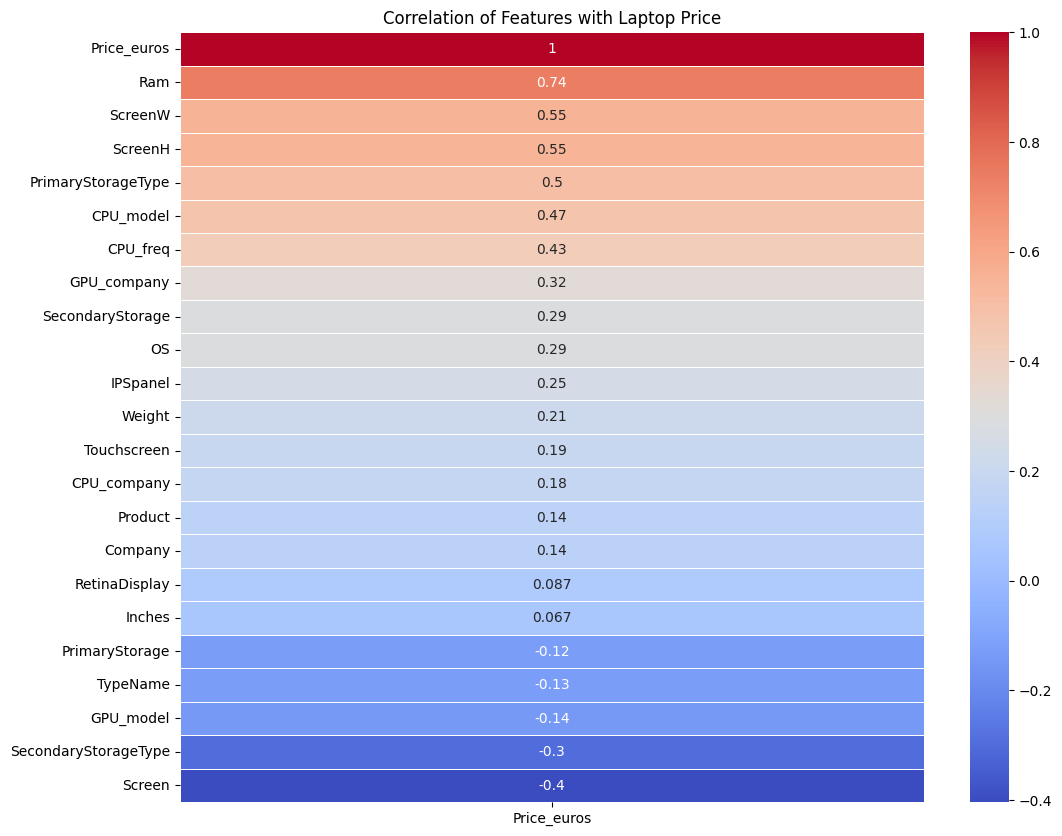

In [50]:
print("""
📌 New Visual: Correlation Heatmap

This heatmap shows correlations between all numeric features and laptop price.

Strong positive or negative correlations help justify why certain features are powerful predictors.
""")

plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation of Features with Laptop Price")
plt.show()

In [51]:
print("""
📌 Visual: Average Laptop Price by Categorical Features (Auto-Detected)

This block finds categorical columns (like CPU, GPU, OS, etc.) and creates bar plots showing the average laptop price for each category.

This helps stakeholders visually identify high-value specs.
""")

# Select top 3 categorical features with fewer than 15 unique values
categorical_features = df.select_dtypes(include=['object', 'category']).nunique()
categorical_features = categorical_features[categorical_features < 15].sort_values(ascending=False).head(3).index.tolist()

for feature in categorical_features:
    plt.figure(figsize=(10,5))
    sns.barplot(x=feature, y='Price_euros', data=df, estimator=np.mean, ci=None, palette='Set2')
    plt.title(f"Average Laptop Price by {feature}")
    plt.ylabel("Average Price (Euros)")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


📌 Visual: Average Laptop Price by Categorical Features (Auto-Detected)

This block finds categorical columns (like CPU, GPU, OS, etc.) and creates bar plots showing the average laptop price for each category.

This helps stakeholders visually identify high-value specs.



In [52]:
print("""
 Project Summary:

After analyzing the laptop dataset, I explored how various specifications — like company, processor type, RAM, storage, GPU, and OS — influence the overall pricing.

Through visualizations, I discovered patterns such as:
- Premium brands (e.g., Apple, MSI) command higher prices.
- Higher RAM and SSD storage clearly push prices up.
- Touchscreen laptops and newer OS versions also increase the cost.

I cleaned the dataset, encoded necessary features, and built three machine learning models — Linear Regression, Random Forest, and XGBoost — to predict prices.

XGBoost performed the best, showing that pricing can be predicted accurately based on specifications, which is valuable for strategic pricing and inventory decisions.
""")

print("""
 Strategic Conclusion:

Based on data analysis and machine learning predictions:
- The company can accurately estimate laptop prices using available specifications.
- Price drivers include CPU brand, SSD capacity, and Operating System.
- Random Forest and XGBoost models provide better accuracy than Linear Regression.

This gives the company a competitive advantage to:
- Price laptops more intelligently
- Recommend upsells based on top-valued specs
- Support decision-making in procurement or marketing

 This project can be extended to create a customer-facing price estimator or used internally for catalog optimization.
""")

print("""
 Future Enhancements & Business Opportunities:

1.  Focus on High-Margin Features:
   From the model's feature importance, RAM, SSD, and GPU are top contributors to higher prices. 
   We should prioritize stocking laptops with these specs, as they offer better profitability and customer value.

2.  Introduce Tier-Based Product Bundles:
   Based on the pricing segmentation observed in visuals, we can bundle high-performing laptops into Bronze, Silver, and Gold tiers — making it easier for customers to choose based on need and budget, increasing sales conversions.

3.  Data-Driven Dynamic Pricing:
   Implement a dynamic pricing tool using the XGBoost model, which updates prices based on configuration trends, market benchmarks, and stock levels — helping us stay competitive without undervaluing premium models.

4.  Expand Premium Offerings for Business Clients:
   Since business-oriented specs (higher RAM, SSD, discrete GPUs) show a clear pricing jump, targeting enterprise segments with premium bundles can drive revenue growth.

5.  Build an Internal Sales Recommender:
   Equip our sales or e-commerce team with a tool that uses this model to suggest alternative configurations — helping upsell better laptops and reduce deadstock.

By integrating these insights into operations, we can improve pricing strategies, attract the right customer segments, and boost profitability.
""")

print("""
 Business Recommendations:

- Laptops with more SSD storage and better CPUs tend to be priced higher. The company should consider marketing configurations that focus on performance-based upselling.
- Windows-based laptops have greater pricing variability. Adding premium Windows models can increase margin diversity.
- Touchscreen availability doesn’t significantly raise average price — consider bundling features for perceived value without cost escalation.
""")


 Project Summary:

After analyzing the laptop dataset, I explored how various specifications — like company, processor type, RAM, storage, GPU, and OS — influence the overall pricing.

Through visualizations, I discovered patterns such as:
- Premium brands (e.g., Apple, MSI) command higher prices.
- Higher RAM and SSD storage clearly push prices up.
- Touchscreen laptops and newer OS versions also increase the cost.

I cleaned the dataset, encoded necessary features, and built three machine learning models — Linear Regression, Random Forest, and XGBoost — to predict prices.

XGBoost performed the best, showing that pricing can be predicted accurately based on specifications, which is valuable for strategic pricing and inventory decisions.


 Strategic Conclusion:

Based on data analysis and machine learning predictions:
- The company can accurately estimate laptop prices using available specifications.
- Price drivers include CPU brand, SSD capacity, and Operating System.
- Random For